In [1]:
import pasttrec_ctrl as ptc

from fst import *
from my_utils import *

# import micos_eco
# import phidrive
import numpy as np
import time
import os



import IPython.display as ipd
import numpy
sr = 24050 # sample rate
T = .4    # seconds
Hz=790
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*Hz*t)        
ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array




Welcome to JupyROOT 6.14/04


In [2]:
# measurement parameters individual settings:
id = "id_test_HV1750V"
#threshold_list = [6, 8, 10, 12, 15, 20, 25, 30, 40, 50]
#threshold_list = range(10,60,2) 
acq_time = 120  #  sec
sync_spill_end = True
ptime_list = [   10  ]
# set PASTTREC default threshold for the measurement
pt_gain_list = [  2  ] 
pt_threshold_list = [ 5  ]
spike_reject_list_TDC = [ 5]
#-----------------------


#predefined systematic measurements for input stage comparison:
measurement_setting = 0  #1 or 2 ... or 7
# 2x  x-scan = 22 steps each  0.1 mm , MDC HV  1780V
# 4x threshold scan  for MDC HV  1780V, 1750V, 1700V, 1650V
# 4x night selftraking 2h for each threshold 15, 30, 50, 10,  MDC HV  1750V
if (measurement_setting == 1):
    id = "id020_highintensityBeam_HV1600V_sr_Scan"
    ptime_list = [   10 ,15 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2,4 ] 
    pt_threshold_list = [ 5  ]
    spike_reject_list_TDC = [0,1,2,3,4,5,6,7,8]
    acq_time = 60*6  #  sec
    sync_spill_end = True
elif  (measurement_setting == 2):
    id = "id021_highintensityBeam_HV1600V_thr_Scan"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  4 ] 
    pt_threshold_list  = range(5,40,2)
    spike_reject_list_TDC = [4]
    acq_time = 60*6  #  sec
    sync_spill_end = True



board_list = [ "0900", "0901","0902","0903","0904", "0905","0906","0907"]
TDClist = ["0x1800","0x1801","0x1802","0x1803"]

scinti_rate = [[] for i in range(0,2)]
    
# end of parameters to edit ############
print(id)


full_loop_time = acq_time
if sync_spill_end:
    acq_time = 18
    full_loop_time = 78 # full spill
minutes = len(pt_threshold_list)*(full_loop_time)*len(pt_gain_list)*len(ptime_list)*len(spike_reject_list_TDC)/60
hours = minutes/60
print("estimated scan duration {:3.1f} minutes or {:3.2f} hours".format(minutes,hours))

import datetime
now = datetime.datetime.now()
print("Starting now {:s} ".format(str(now)))
#print("End at {:s} ".format(str(now+"11:00:11")))

id_test_HV1750V
estimated scan duration 1.3 minutes or 0.02 hours
Starting now 2021-05-21 00:16:15.870965 


In [4]:
import scalers
#trigger_ufsd()
# trigger_scinti()
for ptime in ptime_list: 
 for pt_gain in pt_gain_list:     
  for pt_threshold in pt_threshold_list:  
   for spike_reject_TDC in spike_reject_list_TDC:
         #setTDC spike rejection to ~50ns 
    os.system("trbcmd loadbit 0x1801 0xd580 0xf0000000 0x{:d}0000000".format(spike_reject_TDC))        

    print("")
    print("##############################")
    print("##### setting threshold {:d}".format(pt_threshold))
    print("##### peaking time   {:d} ".format(ptime))
    print("##### gain{:d} ".format(pt_gain))
    print("##### spike rejection  {:d}".format(spike_reject_TDC))
    print("##############################")
#     micos_eco.move(x=x,y=y)
#     if (phi != phidrive.get_angle() ): 
#         phidrive.set_angle(phi)
    ptc.init_active_boards()
    ptc.init_boards_by_name(board_list, ptime, pt_gain, pt_threshold)   
    wait_for_spill(threshold_rate=3000)
    scinti_rate[0] += scalers.scaler_rate("0x0350",[49],4)
    scinti_rate[1] += scalers.scaler_rate("0x0350",[50],4)
    
    if acq_time < 70 :
      wait_for_spill_break(threshold_rate=3000)
      wait_for_spill(threshold_rate=3000)
    if sync_spill_end :
      print("wait 45s until last 10s of spill (low intensity)")
      time.sleep(45)
    print("##### start taking data ######")

    filelabel = "{:s}_thr{:d}_{:d}s_pt{:d}_gain{:d}_sr{:d}".format(id,pt_threshold,acq_time,ptime,pt_gain,spike_reject_TDC)
    print("file = "+filelabel)
    take_raw_data(time=acq_time,label=filelabel) 
    print("##### stopped data taking ######")



##############################
##### setting threshold 5
##############################

##############################
##### peaking time   10 
##############################

##############################
##### gain2 
##############################

##############################
##### spike rejection  5
##############################

## spill start ##
sp sp sp sp sp sp sp sp sp 
## spill break ##
br br br br br br br br br br br br br br 
## spill start ##
wait 45s until last 10s of spill (low intensity)
##### start taking data ######
file = id_test_HV1750V_thr5_18s_pt10_gain2_sr5
##### stopped data taking ######
EventBuilder   0.123194 Set threads layout to balanced
EventBuilder   0.128724 Library loaded libDabcMbs.so
EventBuilder   0.133247 Library loaded libDabcHadaq.so
EventBuilder   0.136337 Library loaded libDabcHttp.so
EventBuilder   0.141444 Library loaded libDabcStream.so
EventBuilder   0.144844 Start DABC server on localhost:1237
EventBuilder   0.145800 JSROOTSYS = /trb

dabc_exe: no process found


archived to ./archive/2021-05-21_00-24-04_take_data_beamtime2021_id_test_HV1750V_18s


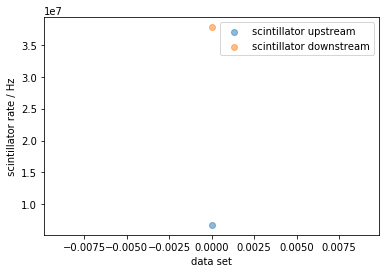

In [8]:
archive(label="{:s}_{:d}s".format(id,acq_time))

from matplotlib import pyplot as plt
# plt.figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k') 
plt.scatter(range(0,len(scinti_rate[0])),scinti_rate[0],alpha=0.5,label = "scintillator upstream")
plt.scatter(range(0,len(scinti_rate[1])),scinti_rate[1],alpha=0.5,label = "scintillator downstream")
plt.xlabel("data set")
plt.ylabel
plt.ylabel(" scintillator rate / Hz ")
#plt.yscale('log')
plt.legend()

plt.savefig('{:s}/{:s}_tot_data_cosy2021_lena_beam_intensity.png'.format("/workdir/data/",id), dpi=100)
plt.show()


import IPython.display as ipd
# ipd.Audio('./tock.wav') # load a local WAV file

import numpy
sr = 24090 # sample rate
T = 5    # seconds
Hz=500
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*Hz*t)        
ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array 